In [33]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from Tools.lazy_spline_cache import create_lazy_spline_cache_f_wrapper
from GraphEdges.HE2_Pipe import HE2_WaterPipeSegment, HE2_OilPipeSegment, HE2_OilPipe
from itertools import product

In [23]:
def f(x, y):
    r = (x*x + y*y)**0.5
    z = np.sin(r) + y
    return z


f2 = create_lazy_spline_cache_f_wrapper(f, dx=0.5, dy=0.5, kind='cubic')

In [24]:
xs = np.linspace(-5, 5, 101)
ys = np.linspace(-5, 5, 101)
zs = np.zeros((101, 101))
for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        zs[i,j] = f2(x,y)

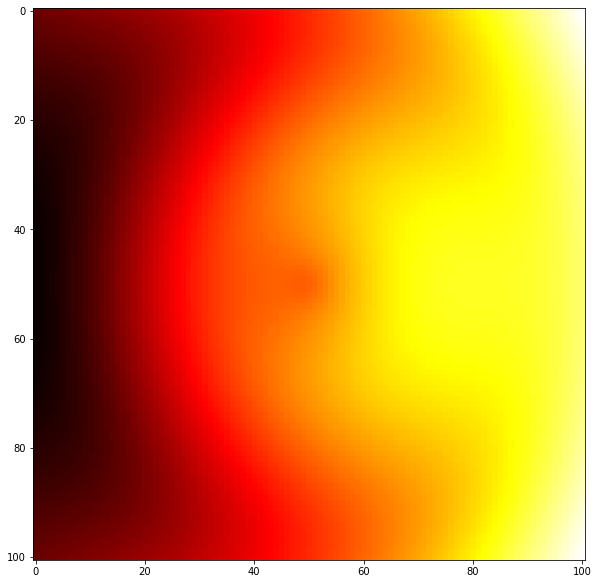

In [25]:
fig = plt.figure(constrained_layout=True, figsize=(12, 8))
ax = fig.add_subplot(1,1,1)

plt.imshow(zs, cmap='hot', interpolation='nearest')
plt.show()

In [26]:
zs2 = zs.copy()
for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        zs2[i,j] = f(x,y)
    

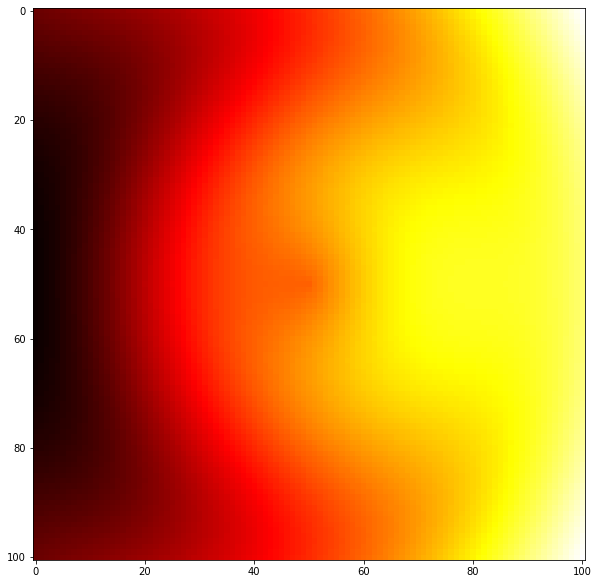

In [30]:
fig = plt.figure(constrained_layout=True, figsize=(12, 8))
ax = fig.add_subplot(1,1,1)

plt.imshow(zs2, cmap='hot', interpolation='nearest')
plt.show()

In [28]:
dz = zs2-zs
print(dz.min(), dz.max())

-0.02306011999307108 0.0849580712404787


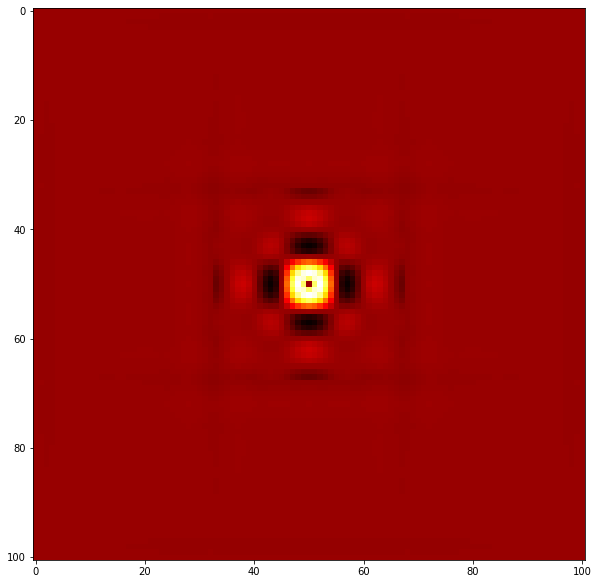

In [29]:
fig = plt.figure(constrained_layout=True, figsize=(12, 8))
ax = fig.add_subplot(1,1,1)

plt.imshow(dz, cmap='hot', interpolation='nearest')
plt.show()

In [59]:
pipe = HE2_OilPipe([10000], [25], [0.125], [1e-5])
def f(p, q):
    p,t = pipe.perform_calc_forward(p, 20, q)
    return p

f2 = create_lazy_spline_cache_f_wrapper(f, dx=0.5, dy=0.1, kind='cubic')


xs = np.linspace(2, 250, 100)
ys = np.linspace(-10, 10, 100)
zs = np.zeros((100, 100))
zs2 = zs.copy()
for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        zs[i,j] = f(x,y)
print(zs.min(), zs.max())

-0.11699044384229085 247.79479206590742


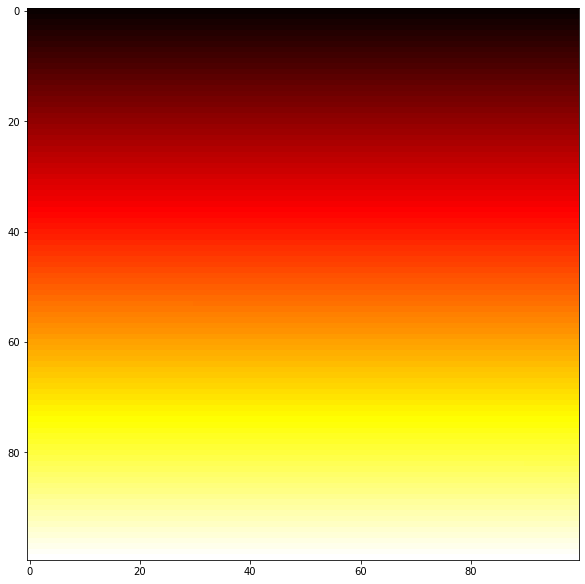

In [60]:
fig = plt.figure(constrained_layout=True, figsize=(12, 8))
ax = fig.add_subplot(1,1,1)

plt.imshow(zs, cmap='hot', interpolation='nearest')
plt.show()

In [61]:
for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        zs2[i,j] = f2(x,y)
print(zs2.min(), zs2.max())

-0.11699044384229093 247.79479206590744


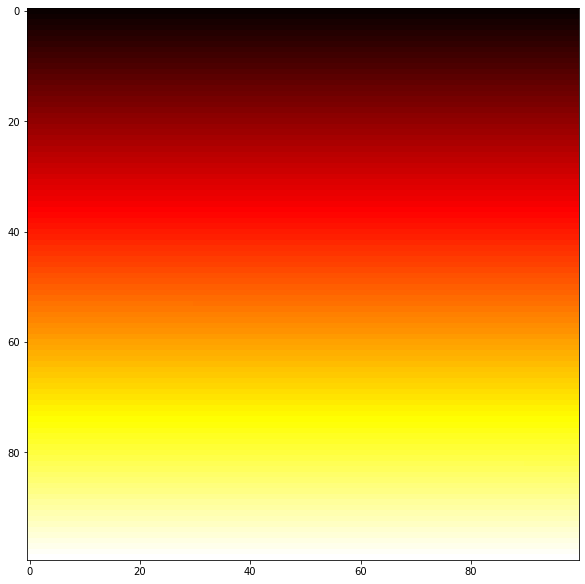

In [62]:
fig = plt.figure(constrained_layout=True, figsize=(12, 8))
ax = fig.add_subplot(1,1,1)

plt.imshow(zs2, cmap='hot', interpolation='nearest')
plt.show()